<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/03_PolynomialRegression_Posotion_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1 . Load data

In [2]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

Cloning into 'DS102.K21'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 210 (delta 42), reused 0 (delta 0), pack-reused 133
Receiving objects: 100% (210/210), 2.22 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [0]:
data_train = pd.read_csv("DS102.K21/Position_SalariesTrain.csv")
data_test = pd.read_csv("DS102.K21/Position_SalariesTest.csv")

# 2 . Split data

In [0]:
X_train = data_train.iloc[:,1:-1].values
y_train = data_train.iloc[:,-1].values
X_test = data_test.iloc[:,1:-1].values
y_test = data_test.iloc[:,-1].values

# 3 . Transfrom 

In [0]:
poly_transform = PolynomialFeatures(degree = 4)
X_poly = poly_transform.fit_transform(X_train)

# 4 . Build model

Linear regression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Polynomial regression

In [7]:
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5 . Visualize

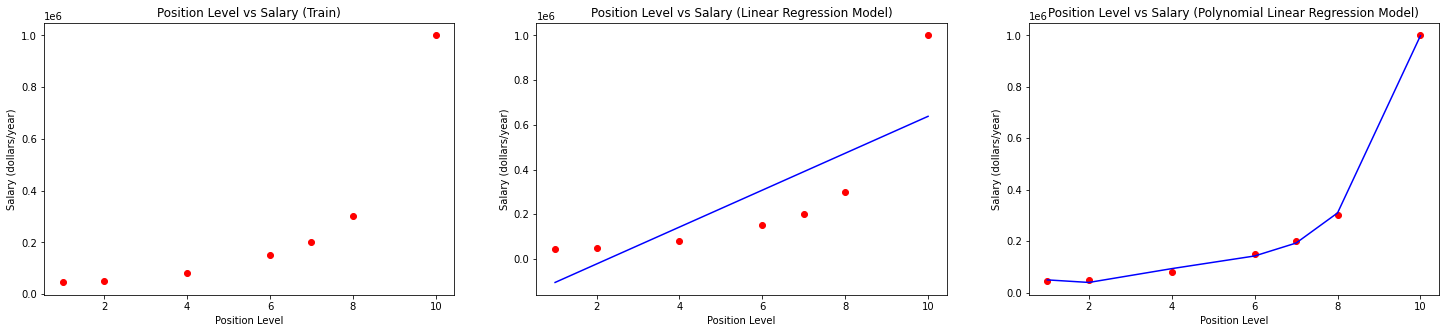

In [8]:
plt.figure(figsize = (25,5))
plt.subplot(1,3,1)
plt.scatter(X_train, y_train, color = 'red')
plt.title("Position Level vs Salary (Train)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
#visualize linear regression
y_pred = lin_reg.predict(X_train)
plt.subplot(1,3,2)
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, y_pred, color = "blue" )
plt.title("Position Level vs Salary (Linear Regression Model)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
#visualize polynomial linear regression
y_poly_pred = poly_lin_reg.predict(X_poly)
plt.subplot(1,3,3)
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, y_poly_pred, color = "blue" )
plt.title("Position Level vs Salary (Polynomial Linear Regression Model)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
plt.show()

# 6 . Compare

In [0]:
def compare(i_example):
    X = X_test[i_example: i_example + 1]
    y = y_test[i_example]
    y_pred = lin_reg.predict(X)
    X_poly = poly_transform.fit_transform(X)
    y_poly_pred = poly_lin_reg.predict(X_poly)
    print(X,y,y_pred, y_poly_pred)

In [10]:
for i in range(len(X_test)):
    compare(i)

[[9]] 500000 [555437.21973094] [552670.08013611]
[[3]] 60000 [60302.69058296] [63555.47530074]
[[5]] 110000 [225347.53363229] [117231.50005633]


# 7 . Evaluate

In [11]:
print('Danh gia mo hinh hoi qui don bien: ',r2_score(y_train, y_pred))
print('Danh gia mo hinh hoi qui don thuc: ',r2_score(y_train, y_poly_pred))

Danh gia mo hinh hoi qui don bien:  0.6310028824447105
Danh gia mo hinh hoi qui don thuc:  0.9992552180215027
